In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
five_shot_likelihoods = np.load("base_model_MMLU/" + f"eval_A_to_D_probs.npy")
correct_answer_idxs = np.load("base_model_MMLU/" + f"eval_answers.npy")
five_shot_likelihoods = five_shot_likelihoods[np.arange(0, len(five_shot_likelihoods)), correct_answer_idxs]


In [42]:
(np.load("base_model_MMLU/" + f"eval_A_to_D_probs.npy").argmax(axis=1) == correct_answer_idxs).mean()

0.418680600914435

In [8]:
uniform50 = np.load("ckpts/fun_sft_uniform_mmlu_llama7B_uniform50/checkpoint_10000/hf_model/eval_A_to_D_probs.npy")
uniform50 = uniform50[np.arange(0, len(uniform50)), correct_answer_idxs]
certain50 = np.load("ckpts/fun_sft_selective_mmlu_llama7B_certain50/checkpoint_10000/hf_model/eval_A_to_D_probs.npy")
certain50 = certain50[np.arange(0, len(certain50)), correct_answer_idxs]
uncertain50 = np.load("ckpts/fun_sft_selective_mmlu_llama7B_uncertain50/checkpoint_10000/hf_model/eval_A_to_D_probs.npy")
uncertain50 = uncertain50[np.arange(0, len(uncertain50)), correct_answer_idxs]

In [33]:

def get_bin_stats(x_axis, y_axis, bins):
    x_axis = np.array(x_axis)
    y_axis = np.array(y_axis)
    bin_avgs = []
    bin_stds = []
    bin_x_avgs = []
    for i in range(len(bins)-1):
        idxs = np.where((x_axis >= bins[i]) & (x_axis < bins[i+1]))[0]
        # print(len(idxs))
        bin_avgs.append(np.mean(y_axis[idxs]))
        bin_stds.append(np.std(y_axis[idxs]))
        bin_x_avgs.append(np.mean(x_axis[idxs]))
    return np.array(bin_avgs), np.array(bin_stds), np.array(bin_x_avgs)

In [39]:
# bins = np.linspace(0, 1, 8)

bins = np.percentile(five_shot_likelihoods, np.linspace(0, 100, 8))

(0.0, 1.0)

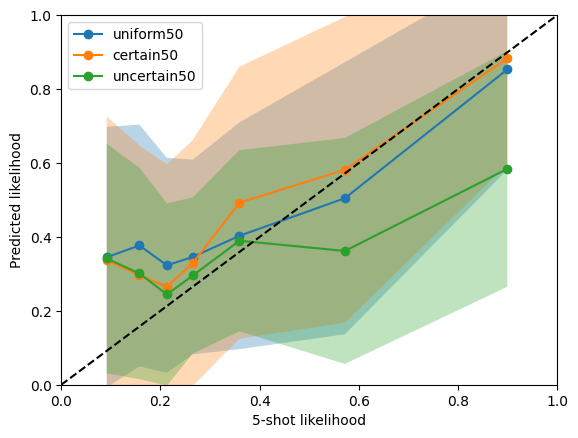

In [43]:
mean, std, bin_x_avgs = get_bin_stats(five_shot_likelihoods, uniform50, bins)

plt.plot(bin_x_avgs, mean, "o-",label="uniform50")
plt.fill_between(bin_x_avgs, mean-std, mean+std, alpha=0.3)

mean, std, bin_x_avgs = get_bin_stats(five_shot_likelihoods, certain50, bins)
plt.plot(bin_x_avgs, mean, "o-",label="certain50")
plt.fill_between(bin_x_avgs, mean-std, mean+std, alpha=0.3)

mean, std, bin_x_avgs = get_bin_stats(five_shot_likelihoods, uncertain50, bins)
plt.plot(bin_x_avgs, mean, "o-",label="uncertain50")
plt.fill_between(bin_x_avgs, mean-std, mean+std, alpha=0.3)

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("5-shot likelihood")
plt.ylabel("Predicted likelihood")
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)

# plt.scatter(five_shot_likelihoods, uniform50, alpha=0.2, label="uniform50")

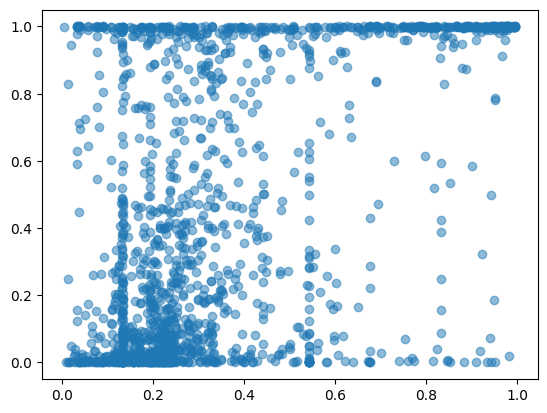

In [11]:
plt.scatter(five_shot_likelihoods, certain50, alpha=0.5, label="uniform50")

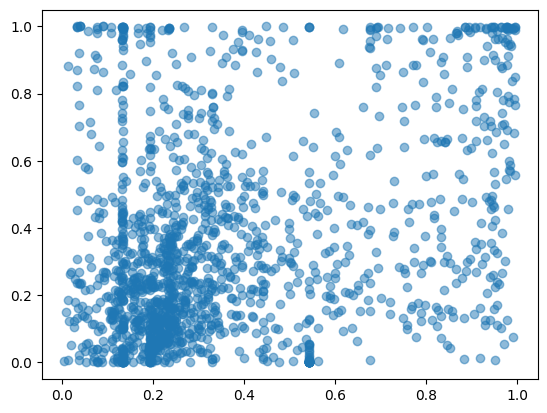

In [12]:
plt.scatter(five_shot_likelihoods, uncertain50, alpha=0.5, label="uniform50")